<a href="https://colab.research.google.com/github/Asma-malica/DL/blob/main/DL_Flower_Image_Classification_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
from zipfile import ZipFile
from tqdm import tqdm

In [ ]:
# code for flower dataset
import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228813984/228813984 [==============================] - 6s 0us/step


## Custom Dataset

In [ ]:
# # Uncompress the feature images and labels csv
# def uncompress_features_labels(dir,name):
#     if(os.path.isdir(name)):
#         print('Data extracted')
#     else:
#         with ZipFile(dir) as zipf:
#             zipf.extractall(name)


In [ ]:
# drive path /content/drive/MyDrive/dataset/data.zip
# uncompress_features_labels('/content/data.zip','poke')

In [ ]:
# data_dir = "/content/poke/data"
# data_dir = pathlib.Path(data_dir)

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


In [ ]:
roses = list(data_dir.glob('roses/*'))


In [ ]:
roses[0]

PosixPath('/root/.keras/datasets/flower_photos/roses/18584002386_cec0df537d_n.jpg')

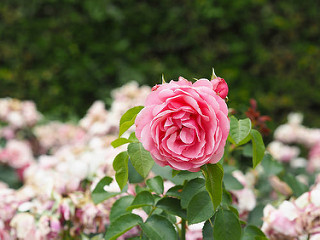

In [ ]:
PIL.Image.open(str(roses[0]))

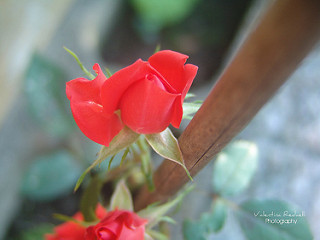

In [ ]:
PIL.Image.open(str(roses[1]))

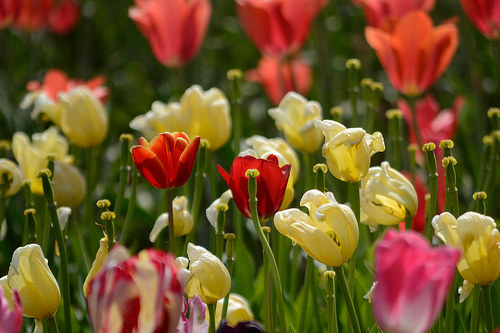

In [ ]:
tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))

In [ ]:
batch_size = 32
img_height = 224
img_width = 224

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size
)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
3670/32 * 20

2293.75

In [ ]:
2300*32

73600

In [ ]:
73600/3670

20.05449591280654

In [ ]:
data_dir

PosixPath('/root/.keras/datasets/flower_photos')

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


In [ ]:
for images, labels in train_ds.take(1):
  print(labels)

tf.Tensor([2 1 4 3 1 2 1 2 4 1 4 4 3 4 1 2 0 4 1 1 1 4 3 2 3 1 4 2 2 3 4 3], shape=(32,), dtype=int32)


In [ ]:
train_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
i = 0
for images, labels in train_ds.take(1):
  print(labels)
  # print(images)
  for l in labels:
    print(i)
    i += 1


tf.Tensor([3 3 4 4 1 3 4 3 4 4 1 3 0 0 2 4 1 3 1 1 1 3 1 2 1 3 4 1 4 4 4 3], shape=(32,), dtype=int32)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31


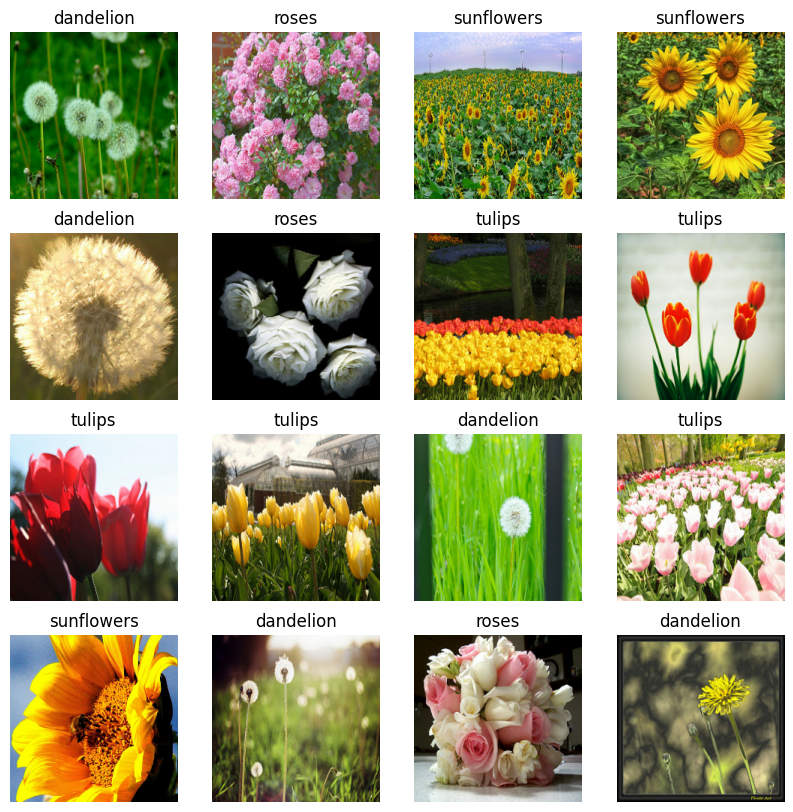

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(16):
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  print(labels_batch)
  break

(32, 224, 224, 3)
(32,)
tf.Tensor([0 1 2 1 0 3 3 1 1 0 3 3 1 1 3 2 4 4 0 1 4 4 2 2 2 1 0 0 2 1 1 1], shape=(32,), dtype=int32)


https://www.tensorflow.org/guide/data_performance#prefetching

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
3 * 3 * 16 * 3 + 16

448

In [ ]:
# num_classes = 5

# model = Sequential([
#  hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", output_shape=[1280], trainable=False),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(num_classes)
# ])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)        1

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 19s 66ms/step - loss: 1.3404 - accuracy: 0.4193 - val_loss: 1.0925 - val_accuracy: 0.5572
Epoch 2/10
92/92 [==============================] - 3s 31ms/step - loss: 0.9579 - accuracy: 0.6253 - val_loss: 0.9183 - val_accuracy: 0.6308
Epoch 3/10
92/92 [==============================] - 3s 32ms/step - loss: 0.7611 - accuracy: 0.7098 - val_loss: 0.8449 - val_accuracy: 0.6608
Epoch 4/10
92/92 [==============================] - 3s 30ms/step - loss: 0.5113 - accuracy: 0.8191 - val_loss: 0.8893 - val_accuracy: 0.6757
Epoch 5/10
92/92 [==============================] - 3s 30ms/step - loss: 0.2963 - accuracy: 0.9012 - val_loss: 1.0368 - val_accuracy: 0.6662
Epoch 6/10
92/92 [==============================] - 3s 30ms/step - loss: 0.1609 - accuracy: 0.9554 - val_loss: 1.1483 - val_accuracy: 0.6676
Epoch 7/10
92/92 [==============================] - 3s 35ms/step - loss: 0.0732 - accuracy: 0.9802 - val_loss: 1.3029 - val_accuracy: 0.6635
Epoch 8/10
9

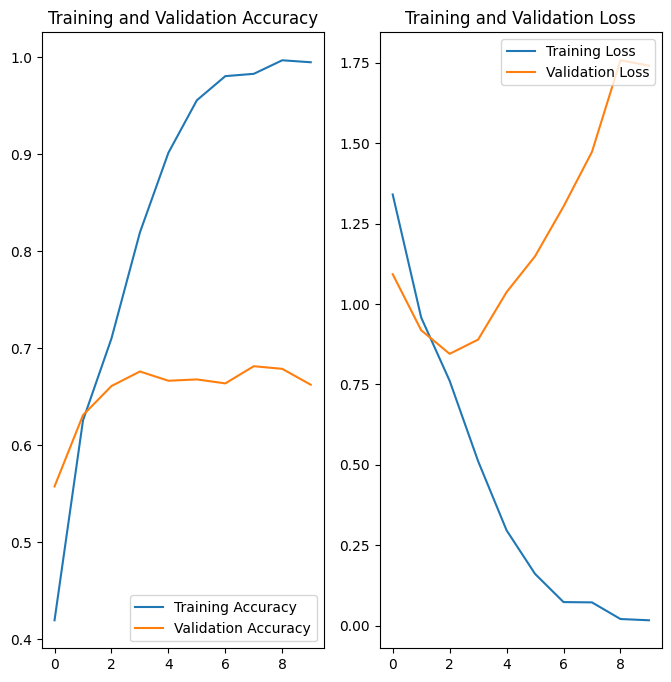

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

1/1 [==============================] - 0s 174ms/step
[0 0 3 0 3 4 1 2 4 0 1 0 0 4 4 3 3 0 0 3 1 4 4 2 3 3 1 0 2 2 1 1]
[[6 1 0 0 0]
 [0 4 1 0 0]
 [1 0 3 0 0]
 [0 0 0 7 0]
 [2 1 0 0 6]]


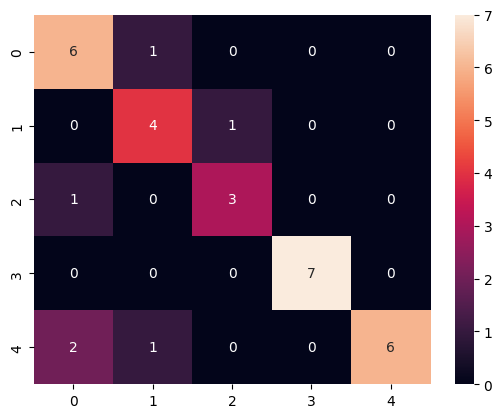

In [ ]:
for d, y in val_ds.take(1):
  y_pred = np.argmax(model.predict(d), axis=1)
  print(y_pred)
  cf_matrix = confusion_matrix(y, y_pred)
  print(cf_matrix)
  sns.heatmap(cf_matrix, annot=True)

1/1 [==============================] - 0s 39ms/step
[0 4 2 1 3 4 2 4 2 3 1 3 0 3 4 2 0 3 4 3 4 1 3 1 3 0 1 4 1 0 3 3]
[[ 5  0  0  0  0]
 [ 0  6  0  0  0]
 [ 0  0  4  0  0]
 [ 0  0  0 10  0]
 [ 0  0  0  0  7]]


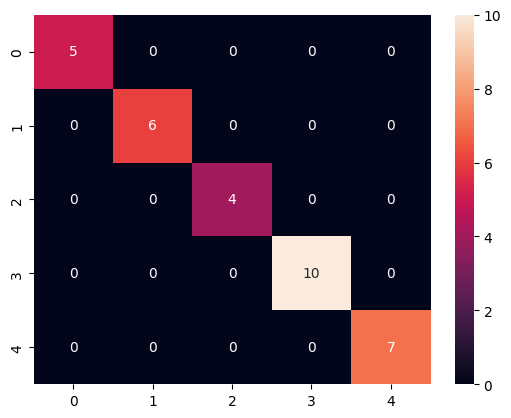

In [ ]:
for d, y in train_ds.take(1):
  y_pred = np.argmax(model.predict(d), axis=1)
  print(y_pred)
  cf_matrix = confusion_matrix(y, y_pred)
  print(cf_matrix)
  sns.heatmap(cf_matrix, annot=True)

## CNN - To improve the Accuracy

- Increase the dataset size
  - Collect more data
  - Data Augmentation
- Overfitting
  - Dropouts
  - Regularisation
- Improve Accuracy
  - Transfer Learning
- Complex Architectures

In [ ]:
3600/5

720.0

In [ ]:
70000/10

7000.0

# Data Augmentation

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip(
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

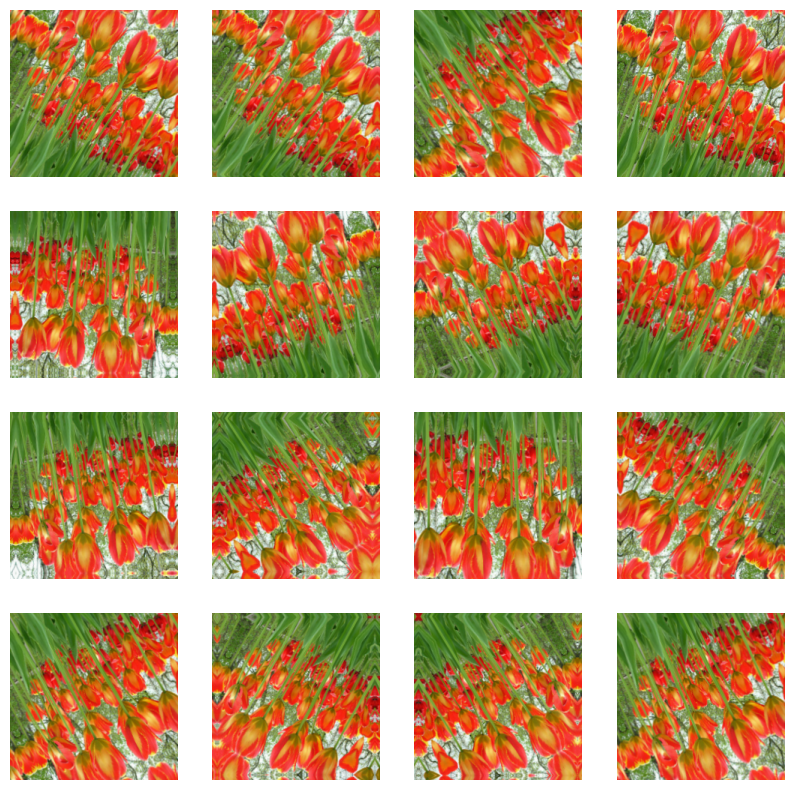

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(16):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(4, 4, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
92/92 [==============================] - 9s 63ms/step - loss: 1.3985 - accuracy: 0.3842 - val_loss: 1.1944 - val_accuracy: 0.5150
Epoch 2/50
92/92 [==============================] - 4s 40ms/step - loss: 1.1252 - accuracy: 0.5487 - val_loss: 1.0635 - val_accuracy: 0.5736
Epoch 3/50
92/92 [==============================] - 4s 39ms/step - loss: 1.0217 - accuracy: 0.5926 - val_loss: 1.0422 - val_accuracy: 0.5708
Epoch 4/50
92/92 [==============================] - 4s 41ms/step - loss: 0.9826 - accuracy: 0.6087 - val_loss: 0.9402 - val_accuracy: 0.6226
Epoch 5/50
92/92 [==============================] - 4s 39ms/step - loss: 0.8976 - accuracy: 0.6437 - val_loss: 0.8935 - val_accuracy: 0.6526
Epoch 6/50
92/92 [==============================] - 4s 39ms/step - loss: 0.8558 - accuracy: 0.6737 - val_loss: 0.8276 - val_accuracy: 0.6757
Epoch 7/50
92/92 [==============================] - 4s 40ms/step - loss: 0.8297 - accuracy: 0.6737 - val_loss: 0.8229 - val_accuracy: 0.6771
Epoch 8/50
92

## Dropout

Another technique to reduce overfitting is to introduce [Dropout](https://developers.google.com/machine-learning/glossary#dropout_regularization) to the network, a form of *regularization*.

When you apply Dropout to a layer it randomly drops out (by setting the activation to zero) a number of output units from the layer during the training process. Dropout takes a fractional number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 20% or 40% of the output units randomly from the applied layer.

Let's create a new neural network using `layers.Dropout`, then train it using augmented images.

In [ ]:
num_classes = 5

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dropout(0.2),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
epochs = 50
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
92/92 [==============================] - 7s 37ms/step - loss: 1.4727 - accuracy: 0.3992 - val_loss: 1.2255 - val_accuracy: 0.4728
Epoch 2/50
92/92 [==============================] - 3s 34ms/step - loss: 1.1511 - accuracy: 0.5218 - val_loss: 1.1541 - val_accuracy: 0.5531
Epoch 3/50
92/92 [==============================] - 3s 34ms/step - loss: 1.0411 - accuracy: 0.5899 - val_loss: 0.9732 - val_accuracy: 0.6104
Epoch 4/50
92/92 [==============================] - 3s 34ms/step - loss: 0.9756 - accuracy: 0.6219 - val_loss: 0.9662 - val_accuracy: 0.6335
Epoch 5/50
92/92 [==============================] - 3s 34ms/step - loss: 0.9232 - accuracy: 0.6240 - val_loss: 0.8799 - val_accuracy: 0.6526
Epoch 6/50
92/92 [==============================] - 3s 34ms/step - loss: 0.8758 - accuracy: 0.6700 - val_loss: 0.9185 - val_accuracy: 0.6403
Epoch 7/50
92/92 [==============================] - 3s 36ms/step - loss: 0.8391 - accuracy: 0.6723 - val_loss: 0.8902 - val_accuracy: 0.6540
Epoch 8/50
92

# How to further improve Accuracy

- Using complex Architecture
- Transfer Learning

In [ ]:
sunflower_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/2/28/Red_rose.jpg/417px-Red_rose.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = keras.preprocessing.image.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 285ms/step
This image most likely belongs to roses with a 89.95 percent confidence.


## TFHUB

# USing Pretrained Classification Models

In [ ]:
import tensorflow_hub as hub


In [ ]:
m = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/tensorflow/efficientnet/b0/classification/1")
])
m.build([None, img_width, img_height, 3])  # Batch input shape.

In [ ]:
predictions = m.predict(img_array)
print(predictions)

1/1 [==============================] - 2s 2s/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [ ]:
print(len(predictions[0]))

1000


In [ ]:
class_label = np.argmax(predictions[0])

In [ ]:
class_label

715

In [ ]:
!wget https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt

--2024-01-19 08:37:36--  https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.207, 173.194.69.207, 173.194.79.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10484 (10K) [text/plain]
Saving to: ‘ImageNetLabels.txt’

ImageNetLabels.txt  100%[===================>]  10.24K  --.-KB/s    in 0s      

2024-01-19 08:37:36 (109 MB/s) - ‘ImageNetLabels.txt’ saved [10484/10484]



In [ ]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

10484/10484 [==============================] - 0s 0us/step


In [ ]:
imagenet_labels[class_label]

'pick'

# USing PRetrained weights and fine tuning it

In [ ]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2"

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=(img_width, img_height, 3)),
    layers.Dense(5, activation='softmax')
])

In [ ]:
classifier.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
(6405 - 5)/5

1280.0

In [ ]:
classifier.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_6 (Dense)             (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [ ]:
epochs = 20
history = classifier.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
92/92 [==============================] - 11s 71ms/step - loss: 1.4135 - accuracy: 0.4312 - val_loss: 1.2981 - val_accuracy: 0.4728
Epoch 2/20
92/92 [==============================] - 5s 51ms/step - loss: 1.1565 - accuracy: 0.5678 - val_loss: 1.2187 - val_accuracy: 0.5082
Epoch 3/20
92/92 [==============================] - 4s 46ms/step - loss: 1.0601 - accuracy: 0.6100 - val_loss: 1.1336 - val_accuracy: 0.5668
Epoch 4/20
92/92 [==============================] - 4s 47ms/step - loss: 0.9854 - accuracy: 0.6366 - val_loss: 1.1108 - val_accuracy: 0.5640
Epoch 5/20
92/92 [==============================] - 4s 48ms/step - loss: 0.9426 - accuracy: 0.6614 - val_loss: 1.1124 - val_accuracy: 0.5627
Epoch 6/20
92/92 [==============================] - 4s 46ms/step - loss: 0.8969 - accuracy: 0.6764 - val_loss: 1.0786 - val_accuracy: 0.5845
Epoch 7/20
92/92 [==============================] - 4s 48ms/step - loss: 0.8688 - accuracy: 0.6877 - val_loss: 1.1029 - val_accuracy: 0.5695
Epoch 8/20
9

# Fine tuning Pretrained MOdel

## Rescale pixel values

In a moment, you will download tf.keras.applications.MobileNetV2 for use as your base model. This model expects pixel vaues in [-1,1], but at this point, the pixel values in your images are in [0-255]. To rescale them, use the preprocessing method included with the model.

In [ ]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
rescale = tf.keras.layers.experimental.preprocessing.Rescaling(1./127.5, offset= -1)

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(img_width, img_height, 3),
                                               include_top=False,
                                               weights='imagenet')

9406464/9406464 [==============================] - 1s 0us/step


In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 224, 224, 3)
(32,)


In [ ]:
image_batch, label_batch = next(iter(train_ds))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(32, 7, 7, 1280)


In [ ]:
base_model.trainable = True

In [ ]:
base_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(32, 1280)


In [ ]:
prediction_layer = tf.keras.layers.Dense(5)
prediction_batch = prediction_layer(feature_batch_average)
print(prediction_batch.shape)

(32, 5)


In [ ]:
inputs = tf.keras.Input(shape=(224, 224, 3))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=True)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
outputs = prediction_layer(x)
model = tf.keras.Model(inputs, outputs)

In [ ]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                             

In [ ]:
initial_epochs = 10

loss0, accuracy0 = model.evaluate(val_ds)

23/23 [==============================] - 3s 46ms/step - loss: 1.9504 - accuracy: 0.1594


In [ ]:
print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

initial loss: 1.95
initial accuracy: 0.16


In [ ]:
history = model.fit(train_ds,
                    epochs=initial_epochs,
                    validation_data=val_ds)

Epoch 1/10
92/92 [==============================] - 41s 153ms/step - loss: 0.6480 - accuracy: 0.7483 - val_loss: 0.3536 - val_accuracy: 0.8801
Epoch 2/10
92/92 [==============================] - 13s 142ms/step - loss: 0.2744 - accuracy: 0.9036 - val_loss: 0.3132 - val_accuracy: 0.8747
Epoch 3/10
92/92 [==============================] - 13s 141ms/step - loss: 0.1917 - accuracy: 0.9319 - val_loss: 0.2859 - val_accuracy: 0.8896
Epoch 4/10
92/92 [==============================] - 13s 139ms/step - loss: 0.1253 - accuracy: 0.9574 - val_loss: 0.2704 - val_accuracy: 0.9046
Epoch 5/10
92/92 [==============================] - 13s 138ms/step - loss: 0.0921 - accuracy: 0.9673 - val_loss: 0.2721 - val_accuracy: 0.8965
Epoch 6/10
92/92 [==============================] - 13s 140ms/step - loss: 0.0668 - accuracy: 0.9796 - val_loss: 0.2723 - val_accuracy: 0.9005
Epoch 7/10
92/92 [==============================] - 13s 140ms/step - loss: 0.0482 - accuracy: 0.9847 - val_loss: 0.2756 - val_accuracy: 0.9046

# Fune tuning

In [ ]:
base_model.trainable = True

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

Number of layers in the base model:  154


In [ ]:
len(base_model.layers)

154

In [ ]:
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 224, 224, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambd  (None, 224, 224, 3)       0         
 a)                                                              
                                                                 
 tf.math.subtract (TFOpLamb  (None, 224, 224, 3)       0         
 da)                                                             
                                                                 
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                             

In [ ]:
len(model.trainable_variables)


56

In [ ]:
fine_tune_epochs = 20
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model.fit(train_ds,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_ds)

Epoch 10/30
92/92 [==============================] - 15s 83ms/step - loss: 0.0172 - accuracy: 0.9956 - val_loss: 0.2595 - val_accuracy: 0.9128
Epoch 11/30
92/92 [==============================] - 6s 70ms/step - loss: 0.0174 - accuracy: 0.9963 - val_loss: 0.2566 - val_accuracy: 0.9155
Epoch 12/30
92/92 [==============================] - 7s 73ms/step - loss: 0.0161 - accuracy: 0.9959 - val_loss: 0.2534 - val_accuracy: 0.9114
Epoch 13/30
92/92 [==============================] - 6s 69ms/step - loss: 0.0133 - accuracy: 0.9969 - val_loss: 0.2532 - val_accuracy: 0.9128
Epoch 14/30
92/92 [==============================] - 7s 72ms/step - loss: 0.0127 - accuracy: 0.9976 - val_loss: 0.2524 - val_accuracy: 0.9196
Epoch 15/30
92/92 [==============================] - 7s 72ms/step - loss: 0.0123 - accuracy: 0.9966 - val_loss: 0.2531 - val_accuracy: 0.9183
Epoch 16/30
92/92 [==============================] - 6s 69ms/step - loss: 0.0119 - accuracy: 0.9966 - val_loss: 0.2529 - val_accuracy: 0.9210
Epoch

1/1 [==============================] - 1s 1s/step
Predictions:
 [0 4 3 0 3 4 1 2 4 0 1 0 4 4 4 3 3 0 0 3 1 4 4 2 3 3 1 2 1 2 4 1]
Labels:
 [0 4 3 0 3 4 1 2 4 0 0 0 4 4 4 3 3 0 0 3 1 4 4 2 3 3 1 2 1 2 4 1]


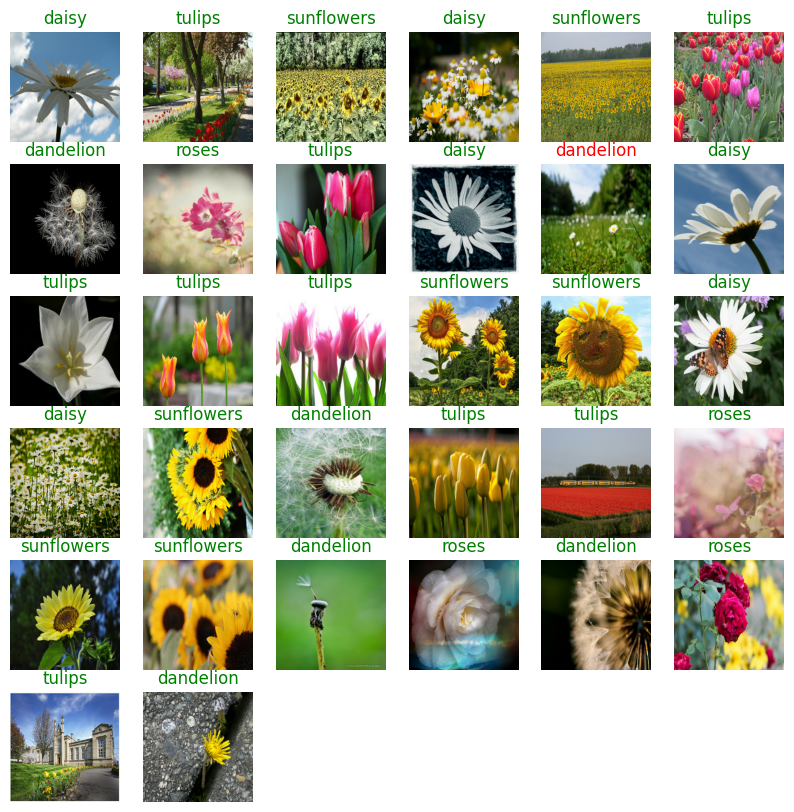

In [ ]:
#Retrieve a batch of images from the test set
image_batch, label_batch = val_ds.as_numpy_iterator().next()
predictions = model.predict(image_batch)

# Apply argmax to return the index of the array
predictions = np.argmax(predictions, axis=-1)

print('Predictions:\n', predictions)
print('Labels:\n', label_batch)

plt.figure(figsize=(10, 10))
for i in range(32):
  ax = plt.subplot(6, 6, i + 1)
  plt.imshow(image_batch[i].astype("uint8"))
  plt.title(class_names[predictions[i]], color='green' if predictions[i] == label_batch[i] else 'red')
  plt.axis("off")

In [ ]:
# # Fetch the Keras session and save the model
# # The signature definition is defined by the input and output tensors,
# # and stored with the default serving key
# import tempfile

# MODEL_DIR = tempfile.gettempdir()
# version = 1
# export_path = os.path.join(MODEL_DIR, str(version))
# print('export_path = {}\n'.format(export_path))

# tf.keras.models.save_model(
#     model,
#     export_path,
#     overwrite=True,
#     include_optimizer=True,
#     save_format=None,
#     signatures=None,
#     options=None
# )

# print('\nSaved model:')
# !ls -l {export_path}

In [ ]:
# !saved_model_cli show --dir {export_path} --all

In [ ]:
# import sys
# # We need sudo prefix if not on a Google Colab.
# if 'google.colab' not in sys.modules:
#   SUDO_IF_NEEDED = 'sudo'
# else:
#   SUDO_IF_NEEDED = ''

In [ ]:
# This is the same as you would do from your command line, but without the [arch=amd64], and no sudo
# You would instead do:
# echo "deb [arch=amd64] http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | sudo tee /etc/apt/sources.list.d/tensorflow-serving.list && \
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | sudo apt-key add -

# !echo "deb http://storage.googleapis.com/tensorflow-serving-apt stable tensorflow-model-server tensorflow-model-server-universal" | {SUDO_IF_NEEDED} tee /etc/apt/sources.list.d/tensorflow-serving.list && \
# curl https://storage.googleapis.com/tensorflow-serving-apt/tensorflow-serving.release.pub.gpg | {SUDO_IF_NEEDED} apt-key add -
# !{SUDO_IF_NEEDED} apt update

In [ ]:
# TODO: Use the latest model server version when colab supports it.
#!{SUDO_IF_NEEDED} apt-get install tensorflow-model-server
# We need to install Tensorflow Model server 2.8 instead of latest version
# Tensorflow Serving >2.9.0 required `GLIBC_2.29` and `GLIBCXX_3.4.26`. Currently colab environment doesn't support latest version of`GLIBC`,so workaround is to use specific version of Tensorflow Serving `2.8.0` to mitigate issue.
# !wget 'http://storage.googleapis.com/tensorflow-serving-apt/pool/tensorflow-model-server-2.8.0/t/tensorflow-model-server/tensorflow-model-server_2.8.0_all.deb'
# !dpkg -i tensorflow-model-server_2.8.0_all.deb
# !pip3 install tensorflow-serving-api==2.8.0

In [ ]:
# os.environ["MODEL_DIR"] = MODEL_DIR

In [ ]:
# %%bash --bg
# nohup tensorflow_model_server \
#   --rest_api_port=8501 \
#   --model_name=fashion_model \
#   --model_base_path="${MODEL_DIR}" >server.log 2>&1


In [ ]:
# !tail server.log

In [ ]:
# class_names

In [ ]:
# def show(idx, title):
#   plt.figure()
#   plt.imshow(val_ds[idx])
#   plt.axis('off')
#   plt.title('\n\n{}'.format(title), fontdict={'size': 16})

# import random
# rando = random.randint(0,len(val_ds)-1)
# show(rando, 'An Example Image: {}'.format(class_names[val_ds[rando]]))

In [ ]:
# import json
# data = json.dumps({"signature_name": "serving_default", "instances": val_ds[0:3].tolist()})
# print('Data: {} ... {}'.format(data[:50], data[len(data)-52:]))

In [ ]:
# # docs_infra: no_execute
# !pip install -q requests

# import requests
# headers = {"content-type": "application/json"}
# json_response = requests.post('http://localhost:8501/v1/models/fashion_model:predict', data=data, headers=headers)
# predictions = json.loads(json_response.text)['predictions']

# show(0, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
#   class_names[np.argmax(predictions[0])], np.argmax(predictions[0]), class_names[test_labels[0]], test_labels[0]))

In [ ]:
# # docs_infra: no_execute
# headers = {"content-type": "application/json"}
# json_response = requests.post('http://localhost:8501/v1/models/fashion_model/versions/1:predict', data=data, headers=headers)
# predictions = json.loads(json_response.text)['predictions']

# for i in range(0,3):
#   show(i, 'The model thought this was a {} (class {}), and it was actually a {} (class {})'.format(
#     class_names[np.argmax(predictions[i])], np.argmax(predictions[i]), class_names[test_labels[i]], test_labels[i]))